# 1. Gathering Data


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read csv file and convert into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
#Null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
# no null values find in dataset

In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
# Visual insights

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

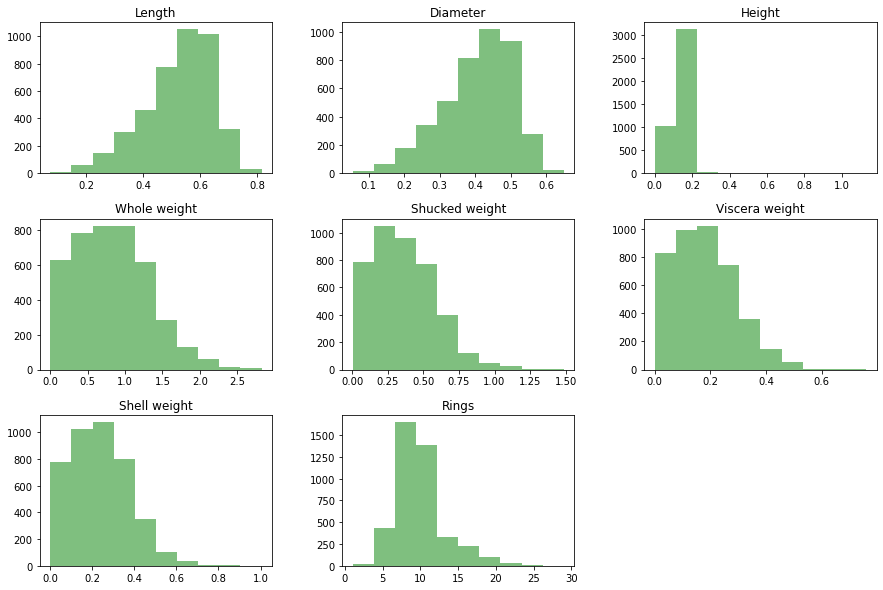

In [9]:
df.hist(figsize=(15,10),grid=False,alpha=0.5,color='green')

In [10]:
#Describe dataset.
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Sex'])

LabelEncoder()

In [13]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

In [14]:
df['Sex']=le.transform(df['Sex'])

In [15]:
le.inverse_transform([2,1,0])

array(['M', 'I', 'F'], dtype=object)

In [16]:
targets = df.pop('Rings')
targets

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [17]:
features = df.iloc[:, :-1]
features

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [18]:
targets = np.array(targets)
features = np.array(features)

In [19]:
#Model Training and Evaluations

In [20]:
# split between the datasets
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,targets,test_size=0.2, random_state = 42)

In [21]:
# Fit only training data
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
scaler.fit(Xtrain)

#Apply transforms to both training and test set
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [22]:
from sklearn.svm import SVR
svm = SVR(kernel ="poly",C=2,gamma="auto",degree=3,epsilon=0.6,coef0=1)
#svm = SVR(kernel ="rbf",c=2,gamma="auto",degree=3,epsilon=0.6,coef0=1)
#svm = SVR(kernel ="linear",c=10,gamma="auto")
svm.fit(Xtrain,Ytrain)

SVR(C=2, coef0=1, epsilon=0.6, gamma='auto', kernel='poly')

In [23]:
svm_preds = np.floor(svm.predict(Xtest))

In [24]:
from sklearn.model_selection import cross_validate
cross_validate(svm,Xtest,Ytest,cv=5)

{'fit_time': array([0.06454015, 0.05794263, 0.05496836, 0.06247592, 0.04687405]),
 'score_time': array([0.        , 0.0079987 , 0.01562428, 0.        , 0.01562262]),
 'test_score': array([0.511691  , 0.56274293, 0.44850276, 0.58046963, 0.44075629])}

In [25]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Ytest,svm_preds)
mae

1.5095693779904307

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2,random_state=0)
rf.fit(Xtest,Ytest)
preds = np.floor(rf.predict(Xtest))

In [27]:
cross_validate(rf,Xtest,Ytest,cv=5)

{'fit_time': array([0.25772214, 0.2031095 , 0.2031312 , 0.21871829, 0.24989462]),
 'score_time': array([0.01560497, 0.01562452, 0.01562428, 0.015625  , 0.0156219 ]),
 'test_score': array([0.33339628, 0.44458489, 0.23611056, 0.40454886, 0.31366892])}

In [28]:
mae=mean_absolute_error(Ytest,preds)
mae

1.6913875598086126

In [29]:
from sklearn.linear_model import SGDRegressor
sgd = RandomForestRegressor(max_depth=2,random_state=0)
rf

sgd.fit(Xtest,Ytest)
preds = np.floor(sgd.predict(Xtest))

In [30]:
mae=mean_absolute_error(Ytest,preds)
mae

1.6913875598086126

In [31]:
from sklearn.neighbors import KNeighborsRegressor as nn
knn = nn(8, weights='uniform')
knn.fit(Xtrain,Ytrain)

KNeighborsRegressor(n_neighbors=8)

In [32]:
preds = np.floor(knn.predict(Xtest))

In [33]:
cross_validate(knn,Xtest,Ytest, cv=5)

{'fit_time': array([0.        , 0.        , 0.00797868, 0.00801897, 0.        ]),
 'score_time': array([0.00801754, 0.        , 0.        , 0.        , 0.00800204]),
 'test_score': array([0.37770523, 0.48820826, 0.42153152, 0.45839804, 0.39094694])}

In [34]:
mae=mean_absolute_error(Ytest,preds)
mae

1.6172248803827751

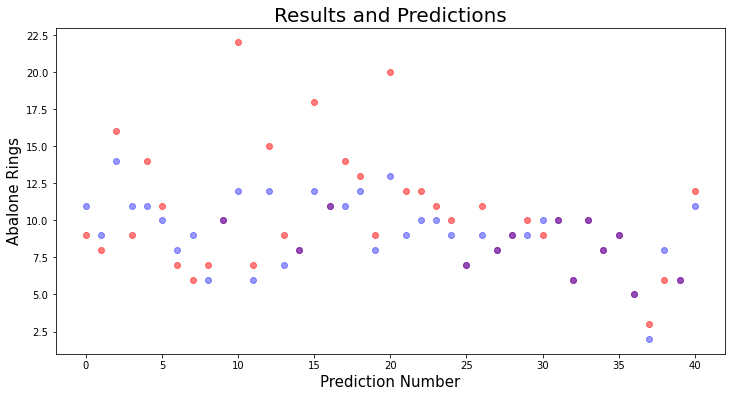

In [35]:
npoints = len(Xtest)
graph_points = np.random.randint(npoints)
xdata = range(len(Xtest[:graph_points]))
ydata = Ytest[:graph_points]
ypreds = svm_preds[:graph_points]
plt.figure(figsize=(12,6))
plt.title("Results and Predictions", size =20)
plt.xlabel('Prediction Number', size = 15)
plt.ylabel('Abalone Rings', size=15)
plt.scatter(xdata,ydata, color ='red',alpha = 0.5)
plt.scatter(xdata,ypreds, color ='blue',alpha = 0.4)
plt.show()

In [36]:
# Model Saving and loading

In [45]:
import pickle


filename = 'model.pkl'
pickle.dump(svm,open(filename, 'wb'))

In [46]:
#load the model from disk
model = pickle.load(open('model.pkl','rb'))
preds = np.floor(model.predict(Xtest))

In [47]:
assert(len(preds) == ((preds == svm_preds) ==True).sum())

In [48]:
Xtest[0]

array([1.15264565, 0.67189513, 0.47107108, 0.47543449, 0.55474298,
       0.27104784, 1.10272193])

In [50]:
#creating a datafreame

In [41]:
df.to_pickle("./dummy.pkl")

In [42]:
df = pd.read_pickle("./dummy.pkl")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960
